In [18]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

# the path of data
data_path = './data/'
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# loading one batch of data
def load_batch(file):
    with open(file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        data = data.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)  # 调整为图像格式
        return data, labels

# merging all the training data
train_data = []
train_labels = []
for i in range(1, 6):
    data, labels = load_batch(data_path + f'data_batch_{i}')
    train_data.append(data)
    train_labels.extend(labels)
train_data = np.concatenate(train_data)
train_labels = np.array(train_labels)

# load testing batch
test_data, test_labels = load_batch(data_path + 'test_batch')

# dividing the dataset into 80% training set and 20% validation set
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42
)


print(f"training set size: {train_data.shape}, validation set size: {val_data.shape}, test set size: {test_data.shape}")


training set size: (40000, 32, 32, 3), validation set size: (10000, 32, 32, 3), test set size: (10000, 32, 32, 3)


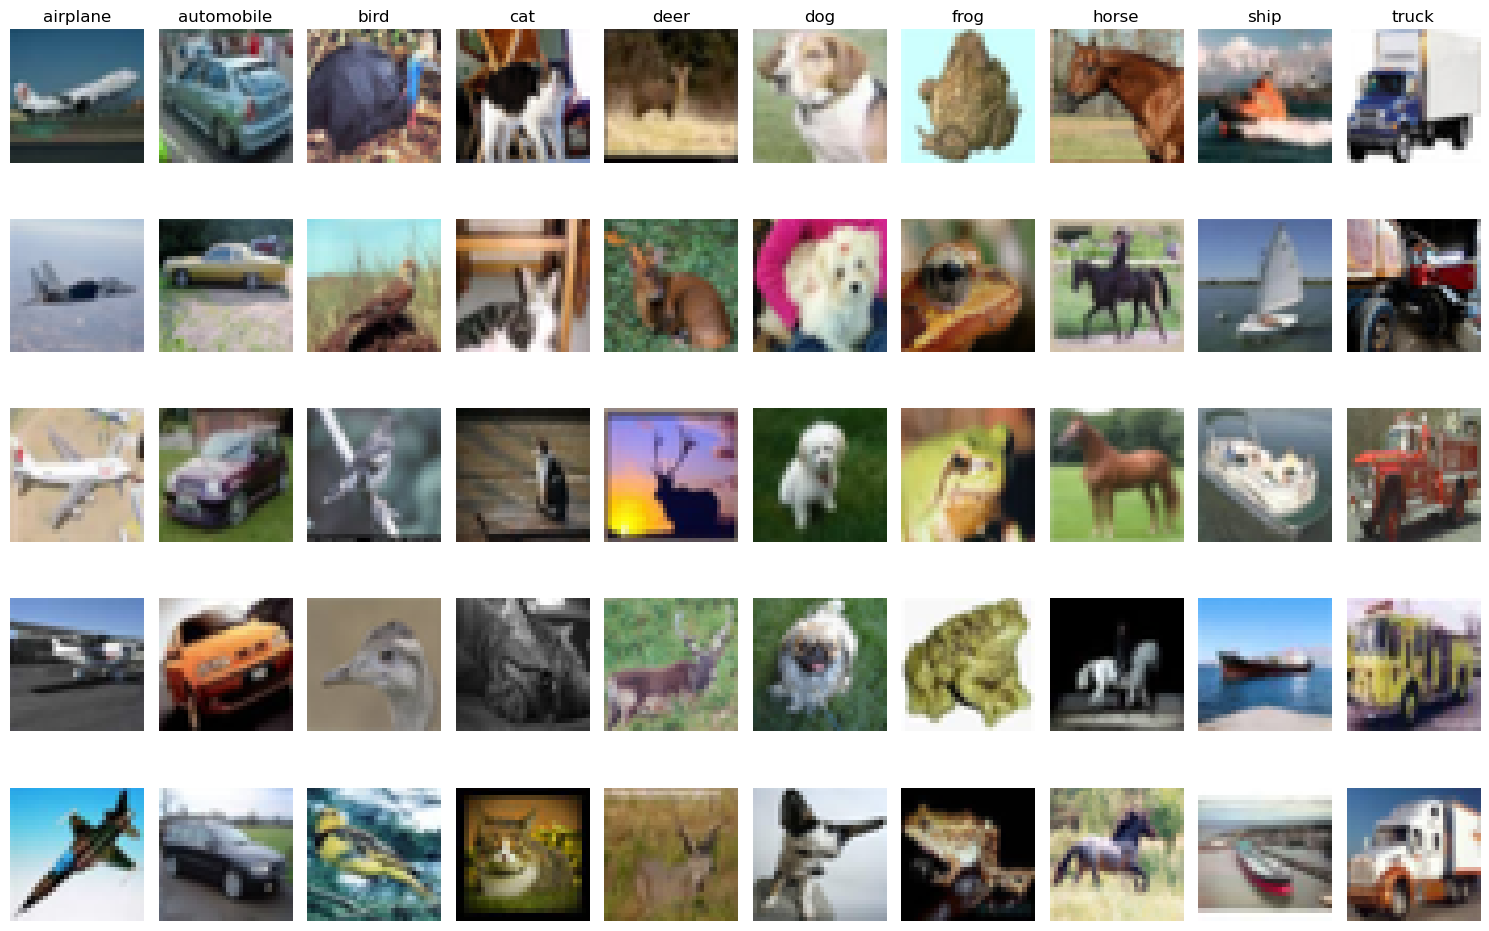

In [19]:
import matplotlib.pyplot as plt
import random

def preview_images(data, labels, class_names, samples_per_class=5):
    plt.figure(figsize=(15, 10))  
    num_classes = len(class_names)
    
    for class_id, class_name in enumerate(class_names):
        # Finding the indexs of all images belong to this category
        idxs = np.flatnonzero(labels == class_id)
        # Randomly choose some images
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + class_id + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(data[idx])
            plt.axis('off')
            if i == 0:
                plt.title(class_name)
    
    plt.tight_layout()  # Adjust layout for clearer view
    plt.show()


preview_images(train_data, train_labels, class_names, samples_per_class=5)


In [20]:
import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

# Load CIFAR-10 training dataset as tensors
dataset = CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False)
print("batch_size:",len(dataset))

# Calculate mean and standard deviation
images, _ = next(iter(data_loader))
mean = images.mean(dim=[0, 2, 3])
std = images.std(dim=[0, 2, 3])

# Print the results
print("Mean:", mean)
print("Std:", std)


Files already downloaded and verified
batch_size: 50000
Mean: tensor([0.4914, 0.4822, 0.4465])
Std: tensor([0.2470, 0.2435, 0.2616])


Files already downloaded and verified
Files already downloaded and verified
Fold 1:


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\lusus/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:13<00:00, 6.63MB/s]


Epoch 1/10, Train Loss: 1.0204, Val Loss: 0.8356, Val Accuracy: 0.7138
Epoch 2/10, Train Loss: 0.7106, Val Loss: 0.7443, Val Accuracy: 0.7491
Epoch 3/10, Train Loss: 0.5938, Val Loss: 0.6135, Val Accuracy: 0.7926
Epoch 4/10, Train Loss: 0.4173, Val Loss: 0.6902, Val Accuracy: 0.7844
Epoch 5/10, Train Loss: 0.3278, Val Loss: 0.6389, Val Accuracy: 0.7964
Epoch 6/10, Train Loss: 0.2514, Val Loss: 0.6971, Val Accuracy: 0.7950
Epoch 7/10, Train Loss: 0.2932, Val Loss: 0.6660, Val Accuracy: 0.8107
Epoch 8/10, Train Loss: 0.2045, Val Loss: 0.6876, Val Accuracy: 0.8003
Epoch 9/10, Train Loss: 0.1359, Val Loss: 0.7876, Val Accuracy: 0.8029
Epoch 10/10, Train Loss: 0.1063, Val Loss: 0.8174, Val Accuracy: 0.7943


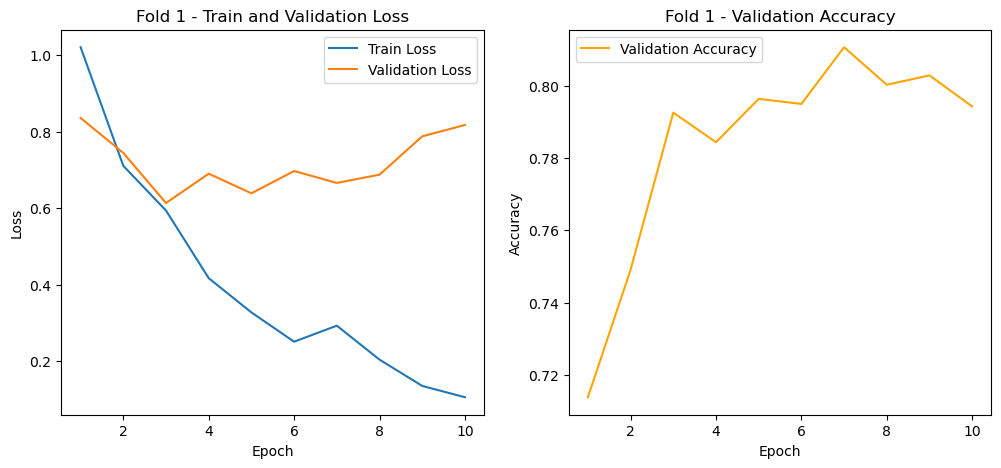

Fold 2:
Epoch 1/10, Train Loss: 0.9962, Val Loss: 0.9806, Val Accuracy: 0.6667
Epoch 2/10, Train Loss: 0.7423, Val Loss: 0.7514, Val Accuracy: 0.7457
Epoch 3/10, Train Loss: 0.5598, Val Loss: 0.6904, Val Accuracy: 0.7576
Epoch 4/10, Train Loss: 0.4388, Val Loss: 0.6036, Val Accuracy: 0.8009
Epoch 5/10, Train Loss: 0.3510, Val Loss: 0.6283, Val Accuracy: 0.7963
Epoch 6/10, Train Loss: 0.2753, Val Loss: 0.6850, Val Accuracy: 0.7885
Epoch 7/10, Train Loss: 0.2018, Val Loss: 0.7316, Val Accuracy: 0.7921
Epoch 8/10, Train Loss: 0.1605, Val Loss: 0.7566, Val Accuracy: 0.7921
Epoch 9/10, Train Loss: 0.1347, Val Loss: 0.7927, Val Accuracy: 0.7896
Epoch 10/10, Train Loss: 0.1591, Val Loss: 0.7468, Val Accuracy: 0.7859


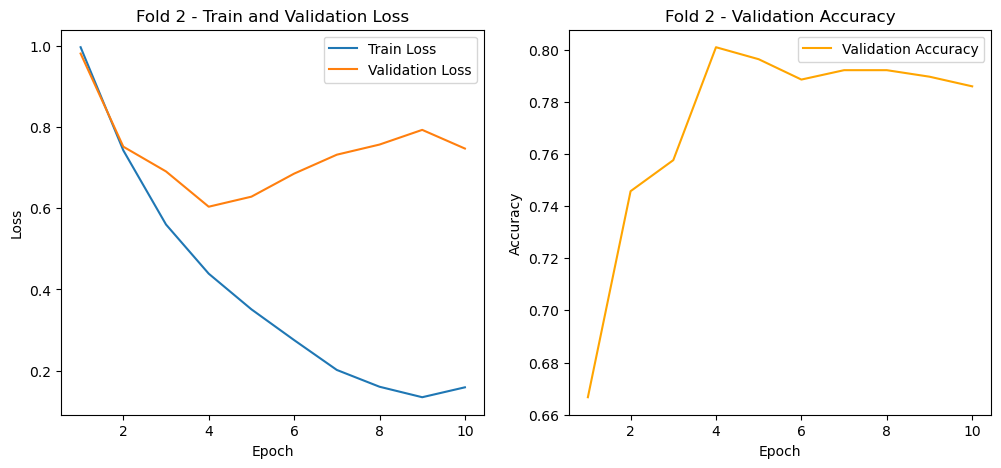

Fold 3:
Epoch 1/10, Train Loss: 1.0003, Val Loss: 0.9417, Val Accuracy: 0.7093
Epoch 2/10, Train Loss: 0.8132, Val Loss: 0.9138, Val Accuracy: 0.7367
Epoch 3/10, Train Loss: 0.5830, Val Loss: 0.6015, Val Accuracy: 0.7925
Epoch 4/10, Train Loss: 0.5326, Val Loss: 0.6394, Val Accuracy: 0.7831
Epoch 5/10, Train Loss: 0.3700, Val Loss: 0.5954, Val Accuracy: 0.8064
Epoch 6/10, Train Loss: 0.2941, Val Loss: 0.6031, Val Accuracy: 0.8094
Epoch 7/10, Train Loss: 0.2326, Val Loss: 0.6543, Val Accuracy: 0.7988
Epoch 8/10, Train Loss: 0.5644, Val Loss: 0.6923, Val Accuracy: 0.7696
Epoch 9/10, Train Loss: 0.2912, Val Loss: 0.6716, Val Accuracy: 0.7982
Epoch 10/10, Train Loss: 0.1282, Val Loss: 0.7845, Val Accuracy: 0.8015


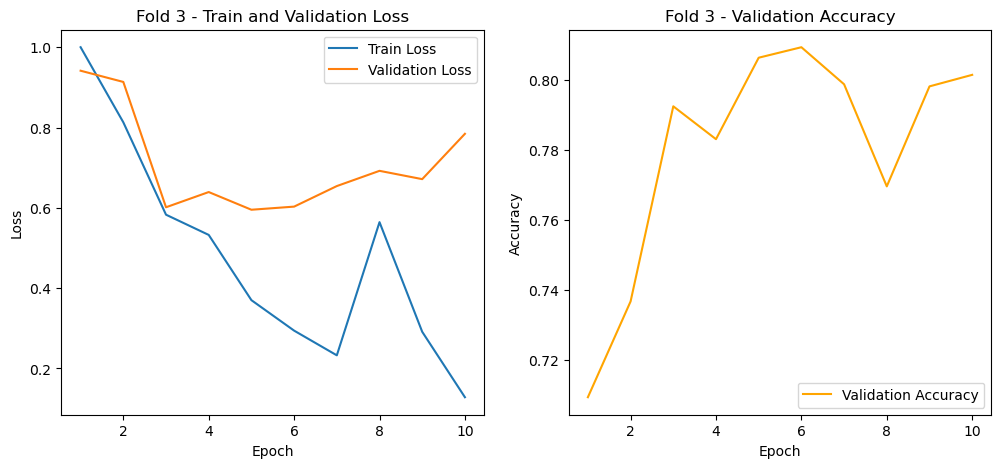

Fold 4:
Epoch 1/10, Train Loss: 1.0116, Val Loss: 0.7586, Val Accuracy: 0.7434
Epoch 2/10, Train Loss: 0.6791, Val Loss: 0.6538, Val Accuracy: 0.7738
Epoch 3/10, Train Loss: 0.5305, Val Loss: 0.6987, Val Accuracy: 0.7664
Epoch 4/10, Train Loss: 0.4062, Val Loss: 0.6490, Val Accuracy: 0.7894
Epoch 5/10, Train Loss: 0.3490, Val Loss: 0.6535, Val Accuracy: 0.7895
Epoch 6/10, Train Loss: 0.4092, Val Loss: 0.6259, Val Accuracy: 0.8063
Epoch 7/10, Train Loss: 0.1900, Val Loss: 0.6782, Val Accuracy: 0.8032
Epoch 8/10, Train Loss: 0.1879, Val Loss: 0.7359, Val Accuracy: 0.8050
Epoch 9/10, Train Loss: 0.2841, Val Loss: 0.6924, Val Accuracy: 0.8007
Epoch 10/10, Train Loss: 0.1131, Val Loss: 0.8247, Val Accuracy: 0.8043


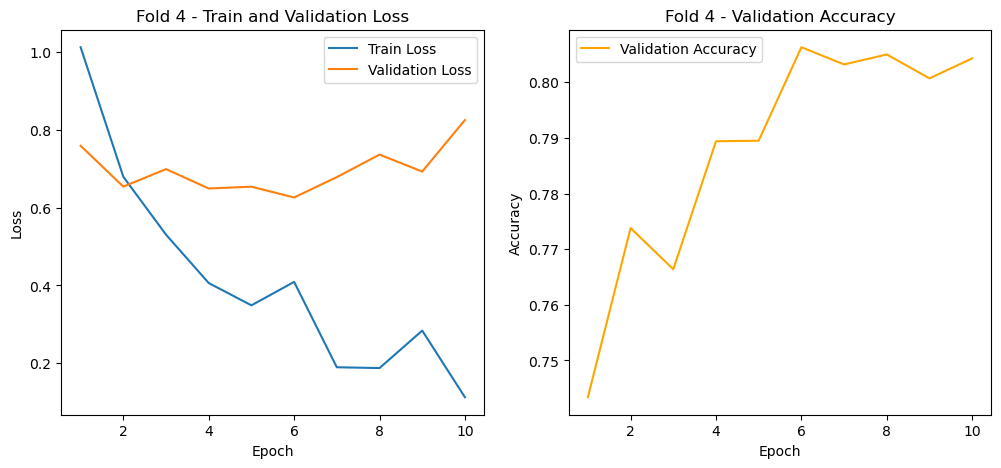

Fold 5:
Epoch 1/10, Train Loss: 0.9913, Val Loss: 0.7357, Val Accuracy: 0.7419
Epoch 2/10, Train Loss: 0.6781, Val Loss: 0.7005, Val Accuracy: 0.7604
Epoch 3/10, Train Loss: 0.5453, Val Loss: 0.6417, Val Accuracy: 0.7808
Epoch 4/10, Train Loss: 0.4070, Val Loss: 0.6354, Val Accuracy: 0.7840
Epoch 5/10, Train Loss: 0.3133, Val Loss: 0.6278, Val Accuracy: 0.7986
Epoch 6/10, Train Loss: 0.2407, Val Loss: 0.6587, Val Accuracy: 0.7995
Epoch 7/10, Train Loss: 0.1883, Val Loss: 0.7697, Val Accuracy: 0.7820
Epoch 8/10, Train Loss: 0.1542, Val Loss: 0.7724, Val Accuracy: 0.7937
Epoch 9/10, Train Loss: 0.1251, Val Loss: 0.7882, Val Accuracy: 0.7964
Epoch 10/10, Train Loss: 0.1155, Val Loss: 0.8247, Val Accuracy: 0.7955


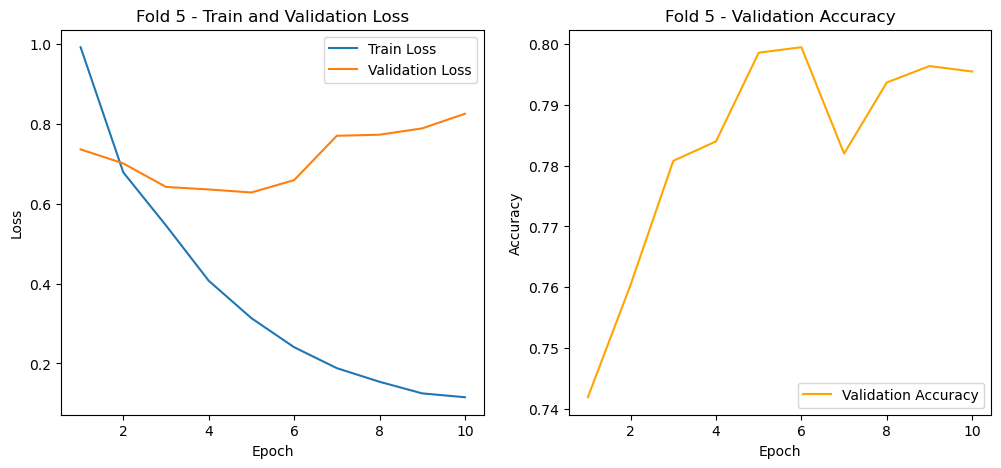

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


# Load CIFAR-10 training and test datasets
full_train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create DataLoader for the test set
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model template (ResNet-34)
def create_resnet34_model():
    model = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)  # Using pretrained weights
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)  # CIFAR-10 has 10 classes
    return model

# Set training parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
num_epochs = 10  
batch_size = 64
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Function to train the model
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Function to validate the model
def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
    accuracy = correct / len(val_loader.dataset)
    return total_loss / len(val_loader), accuracy

# Cross-validation loop
fold = 1
for train_idx, val_idx in kf.split(full_train_dataset):
    print(f"Fold {fold}:")
    
    # Create training and validation subsets
    train_dataset = Subset(full_train_dataset, train_idx)
    val_dataset = Subset(full_train_dataset, val_idx)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Create a new instance of ResNet-34
    model = create_resnet34_model().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate(model, val_loader, criterion, device)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    # Plotting training and validation metrics for each fold
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Fold {fold} - Train and Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Fold {fold} - Validation Accuracy')
    plt.show()
    
    fold += 1


Files already downloaded and verified
Files already downloaded and verified
Training with SGD, learning rate: 0.01
Epoch 1/10, Train Loss: 1.8845, Train Accuracy: 0.3072, Val Loss: 1.6522, Val Accuracy: 0.3938
Epoch 2/10, Train Loss: 1.5888, Train Accuracy: 0.4147, Val Loss: 1.4989, Val Accuracy: 0.4439
Epoch 3/10, Train Loss: 1.4591, Train Accuracy: 0.4683, Val Loss: 1.4183, Val Accuracy: 0.4860
Epoch 4/10, Train Loss: 1.3583, Train Accuracy: 0.5069, Val Loss: 1.3080, Val Accuracy: 0.5275
Epoch 5/10, Train Loss: 1.2774, Train Accuracy: 0.5370, Val Loss: 1.3148, Val Accuracy: 0.5274
Epoch 6/10, Train Loss: 1.2149, Train Accuracy: 0.5632, Val Loss: 1.1822, Val Accuracy: 0.5747
Epoch 7/10, Train Loss: 1.1575, Train Accuracy: 0.5885, Val Loss: 1.1182, Val Accuracy: 0.5923
Epoch 8/10, Train Loss: 1.1075, Train Accuracy: 0.6020, Val Loss: 1.0974, Val Accuracy: 0.6075
Epoch 9/10, Train Loss: 1.0607, Train Accuracy: 0.6219, Val Loss: 1.0615, Val Accuracy: 0.6135
Epoch 10/10, Train Loss: 1.022

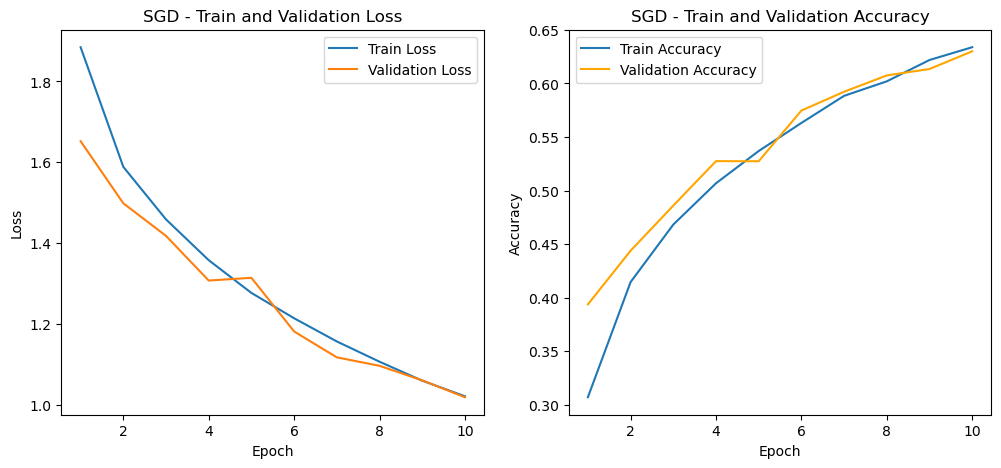

Training with SGD, learning rate: 0.001
Epoch 1/10, Train Loss: 2.1890, Train Accuracy: 0.1935, Val Loss: 2.0122, Val Accuracy: 0.2556
Epoch 2/10, Train Loss: 1.9380, Train Accuracy: 0.2817, Val Loss: 1.8404, Val Accuracy: 0.3157
Epoch 3/10, Train Loss: 1.8052, Train Accuracy: 0.3268, Val Loss: 1.7322, Val Accuracy: 0.3511
Epoch 4/10, Train Loss: 1.7245, Train Accuracy: 0.3555, Val Loss: 1.6752, Val Accuracy: 0.3790
Epoch 5/10, Train Loss: 1.6677, Train Accuracy: 0.3807, Val Loss: 1.6221, Val Accuracy: 0.3981
Epoch 6/10, Train Loss: 1.6185, Train Accuracy: 0.3976, Val Loss: 1.5809, Val Accuracy: 0.4104
Epoch 7/10, Train Loss: 1.5832, Train Accuracy: 0.4134, Val Loss: 1.5486, Val Accuracy: 0.4242
Epoch 8/10, Train Loss: 1.5490, Train Accuracy: 0.4283, Val Loss: 1.5148, Val Accuracy: 0.4437
Epoch 9/10, Train Loss: 1.5212, Train Accuracy: 0.4392, Val Loss: 1.5068, Val Accuracy: 0.4449
Epoch 10/10, Train Loss: 1.4896, Train Accuracy: 0.4511, Val Loss: 1.4682, Val Accuracy: 0.4567


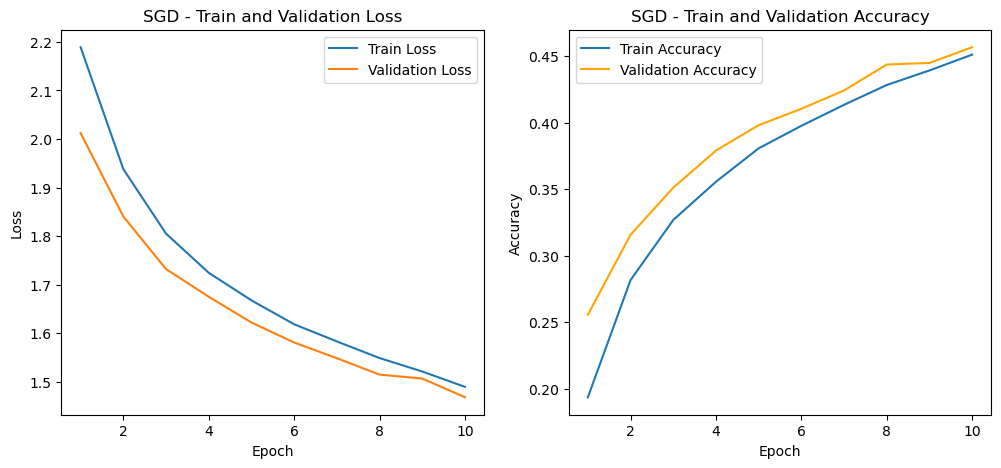

Training with Adam, learning rate: 0.01
Epoch 1/10, Train Loss: 2.1326, Train Accuracy: 0.2379, Val Loss: 1.8352, Val Accuracy: 0.3119
Epoch 2/10, Train Loss: 1.6309, Train Accuracy: 0.3868, Val Loss: 1.5203, Val Accuracy: 0.4245
Epoch 3/10, Train Loss: 1.4272, Train Accuracy: 0.4764, Val Loss: 1.3406, Val Accuracy: 0.5210
Epoch 4/10, Train Loss: 1.2409, Train Accuracy: 0.5548, Val Loss: 1.2004, Val Accuracy: 0.5664
Epoch 5/10, Train Loss: 1.1180, Train Accuracy: 0.6034, Val Loss: 1.1296, Val Accuracy: 0.6022
Epoch 6/10, Train Loss: 1.0344, Train Accuracy: 0.6363, Val Loss: 0.9916, Val Accuracy: 0.6398
Epoch 7/10, Train Loss: 0.9681, Train Accuracy: 0.6610, Val Loss: 1.0029, Val Accuracy: 0.6585
Epoch 8/10, Train Loss: 0.9052, Train Accuracy: 0.6859, Val Loss: 0.9050, Val Accuracy: 0.6912
Epoch 9/10, Train Loss: 0.8613, Train Accuracy: 0.6992, Val Loss: 0.9299, Val Accuracy: 0.6818
Epoch 10/10, Train Loss: 0.8158, Train Accuracy: 0.7177, Val Loss: 0.8334, Val Accuracy: 0.7137


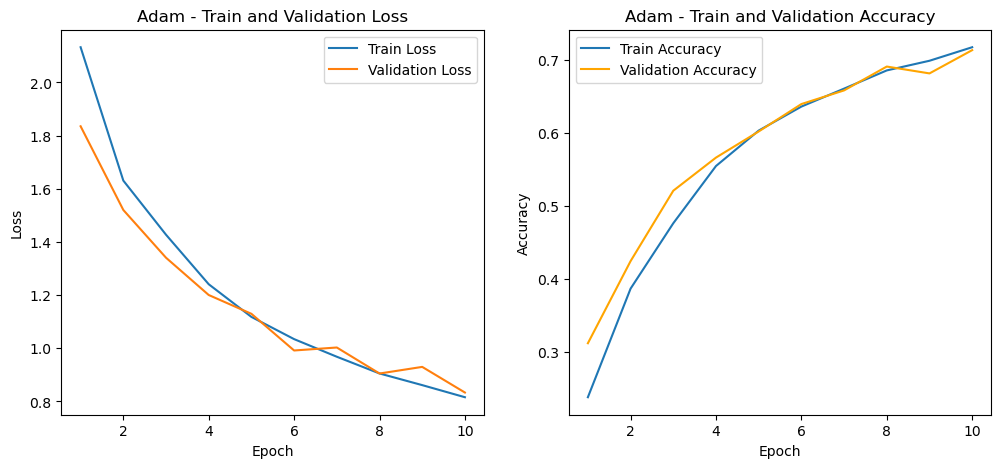

Training with Adam, learning rate: 0.001
Epoch 1/10, Train Loss: 1.7068, Train Accuracy: 0.3775, Val Loss: 1.5258, Val Accuracy: 0.4430
Epoch 2/10, Train Loss: 1.3640, Train Accuracy: 0.5123, Val Loss: 1.2696, Val Accuracy: 0.5445
Epoch 3/10, Train Loss: 1.1774, Train Accuracy: 0.5878, Val Loss: 1.1180, Val Accuracy: 0.6101
Epoch 4/10, Train Loss: 1.0599, Train Accuracy: 0.6294, Val Loss: 1.1685, Val Accuracy: 0.6115
Epoch 5/10, Train Loss: 1.1247, Train Accuracy: 0.6090, Val Loss: 1.0604, Val Accuracy: 0.6289
Epoch 6/10, Train Loss: 0.9455, Train Accuracy: 0.6704, Val Loss: 0.9145, Val Accuracy: 0.6836
Epoch 7/10, Train Loss: 0.8887, Train Accuracy: 0.6907, Val Loss: 0.8220, Val Accuracy: 0.7166
Epoch 8/10, Train Loss: 0.8433, Train Accuracy: 0.7079, Val Loss: 0.7966, Val Accuracy: 0.7250
Epoch 9/10, Train Loss: 0.7762, Train Accuracy: 0.7294, Val Loss: 0.8032, Val Accuracy: 0.7197
Epoch 10/10, Train Loss: 0.7386, Train Accuracy: 0.7435, Val Loss: 0.7949, Val Accuracy: 0.7302


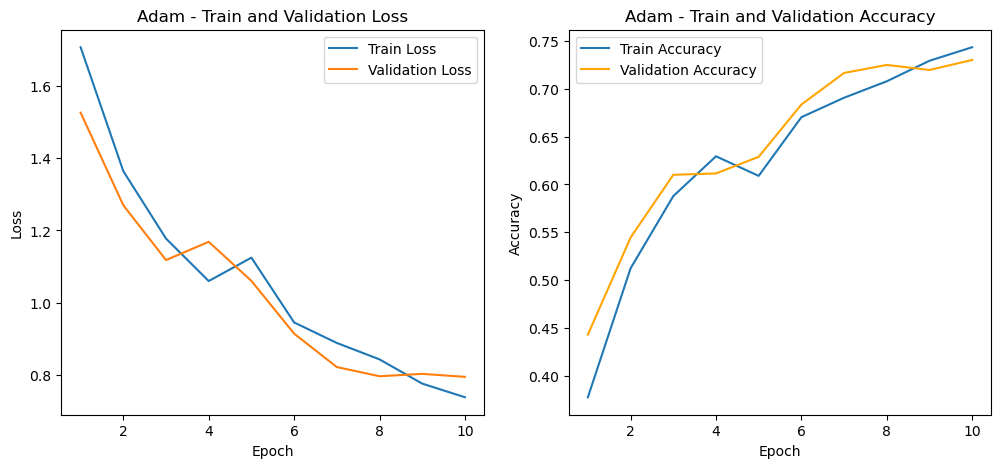

Best hyper-parameters: Optimizer=Adam, Learning rate=0.001
Epoch 1/10, Train Loss: 1.6694, Train Accuracy: 0.3883, Val Loss: 1.5652, Val Accuracy: 0.4438
Epoch 2/10, Train Loss: 1.3133, Train Accuracy: 0.5268, Val Loss: 1.2740, Val Accuracy: 0.5452
Epoch 3/10, Train Loss: 1.1607, Train Accuracy: 0.5892, Val Loss: 1.0754, Val Accuracy: 0.6101
Epoch 4/10, Train Loss: 1.0306, Train Accuracy: 0.6393, Val Loss: 1.0565, Val Accuracy: 0.6268
Epoch 5/10, Train Loss: 0.9469, Train Accuracy: 0.6723, Val Loss: 0.9642, Val Accuracy: 0.6667
Epoch 6/10, Train Loss: 0.8766, Train Accuracy: 0.6957, Val Loss: 0.9685, Val Accuracy: 0.6656
Epoch 7/10, Train Loss: 0.8238, Train Accuracy: 0.7139, Val Loss: 0.9365, Val Accuracy: 0.6872
Epoch 8/10, Train Loss: 0.8114, Train Accuracy: 0.7224, Val Loss: 0.7723, Val Accuracy: 0.7307
Epoch 9/10, Train Loss: 0.7356, Train Accuracy: 0.7482, Val Loss: 0.7463, Val Accuracy: 0.7442
Epoch 10/10, Train Loss: 0.8400, Train Accuracy: 0.7133, Val Loss: 0.7933, Val Accurac

In [28]:
# Hyper-parameter tuning version
# Due to computaional resource limitation, eliminate cross-validation method
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset with existing normalization applied
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load CIFAR-10 training dataset
full_train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split training data into training and separate validation set (e.g., 80-20 split)
train_idx, val_idx = train_test_split(range(len(full_train_dataset)), test_size=0.2, random_state=42)
train_dataset = Subset(full_train_dataset, train_idx)
val_dataset = Subset(full_train_dataset, val_idx)

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Load CIFAR-10 test dataset
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model template (ResNet-34)
def create_resnet34_model():
    model = models.resnet34(weights=None)  # NOT using pretrained weights
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 10)  # CIFAR-10 has 10 classes
    return model

# Set training parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
num_epochs = 10  # Adjusted number of epochs for faster training
batch_size = 64

# Function to train the model
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)
    accuracy = correct / total_samples
    return total_loss / len(train_loader), accuracy

# Function to validate the model
def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
    accuracy = correct / len(val_loader.dataset)
    return total_loss / len(val_loader), accuracy

# Hyper-parameter tuning: Experiment with different optimizers and learning rates
hyper_params = [
    (optim.SGD, 0.01),
    (optim.SGD, 0.001),
    (optim.Adam, 0.01),
    (optim.Adam, 0.001)
]

best_val_accuracy = 0
best_hyper_params = None

for opt_func, lr, *kwargs in hyper_params:
    print(f"Training with {opt_func.__name__}, learning rate: {lr}")

    # Create a new instance of ResNet-34
    model = create_resnet34_model().to(device)
    optimizer = opt_func(model.parameters(), lr=lr, **(kwargs[0] if kwargs else {}))

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Track best hyper-parameters
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_hyper_params = (opt_func, lr, kwargs)

    # Plotting training and validation metrics for this configuration
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{opt_func.__name__} - Train and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{opt_func.__name__} - Train and Validation Accuracy')
    plt.show()

# Report test accuracy using the best hyper-parameters
print(f"Best hyper-parameters: Optimizer={best_hyper_params[0].__name__}, Learning rate={best_hyper_params[1]}")
model = create_resnet34_model().to(device)
optimizer = best_hyper_params[0](model.parameters(), lr=best_hyper_params[1], **(best_hyper_params[2][0] if best_hyper_params[2] else {}))

# Train final model with best hyper-parameters
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Evaluate on the test set
test_loss, test_accuracy = validate(model, test_loader, criterion, device)
print(f"Test Accuracy: {test_accuracy:.4f}")


Files already downloaded and verified
Files already downloaded and verified
Training with SGD, learning rate: 0.01
Epoch 1/10, Train Loss: 2.1546, Train Accuracy: 0.1862, Val Loss: 1.9572, Val Accuracy: 0.2647
Epoch 2/10, Train Loss: 1.8634, Train Accuracy: 0.2947, Val Loss: 1.7514, Val Accuracy: 0.3425
Epoch 3/10, Train Loss: 1.7320, Train Accuracy: 0.3493, Val Loss: 1.6477, Val Accuracy: 0.3854
Epoch 4/10, Train Loss: 1.6541, Train Accuracy: 0.3847, Val Loss: 1.5915, Val Accuracy: 0.4059
Epoch 5/10, Train Loss: 1.5968, Train Accuracy: 0.4073, Val Loss: 1.5233, Val Accuracy: 0.4386
Epoch 6/10, Train Loss: 1.5453, Train Accuracy: 0.4300, Val Loss: 1.4820, Val Accuracy: 0.4553
Epoch 7/10, Train Loss: 1.5028, Train Accuracy: 0.4500, Val Loss: 1.4811, Val Accuracy: 0.4574
Epoch 8/10, Train Loss: 1.4680, Train Accuracy: 0.4647, Val Loss: 1.4151, Val Accuracy: 0.4796
Epoch 9/10, Train Loss: 1.4357, Train Accuracy: 0.4758, Val Loss: 1.3865, Val Accuracy: 0.4971
Epoch 10/10, Train Loss: 1.404

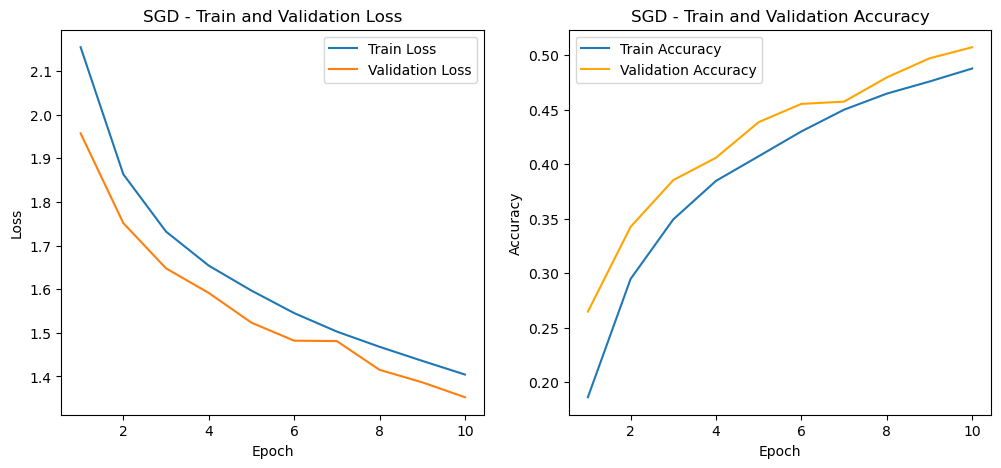

Training with SGD, learning rate: 0.001
Epoch 1/10, Train Loss: 2.3161, Train Accuracy: 0.1240, Val Loss: 2.2550, Val Accuracy: 0.1435
Epoch 2/10, Train Loss: 2.2263, Train Accuracy: 0.1538, Val Loss: 2.1609, Val Accuracy: 0.1796
Epoch 3/10, Train Loss: 2.1314, Train Accuracy: 0.1893, Val Loss: 2.0815, Val Accuracy: 0.2013
Epoch 4/10, Train Loss: 2.0730, Train Accuracy: 0.2064, Val Loss: 2.0218, Val Accuracy: 0.2264
Epoch 5/10, Train Loss: 2.0160, Train Accuracy: 0.2283, Val Loss: 1.9636, Val Accuracy: 0.2512
Epoch 6/10, Train Loss: 1.9621, Train Accuracy: 0.2487, Val Loss: 1.9034, Val Accuracy: 0.2670
Epoch 7/10, Train Loss: 1.9019, Train Accuracy: 0.2692, Val Loss: 1.8595, Val Accuracy: 0.2812
Epoch 8/10, Train Loss: 1.8648, Train Accuracy: 0.2847, Val Loss: 1.8334, Val Accuracy: 0.3009
Epoch 9/10, Train Loss: 1.8341, Train Accuracy: 0.2991, Val Loss: 1.7807, Val Accuracy: 0.3237
Epoch 10/10, Train Loss: 1.7954, Train Accuracy: 0.3179, Val Loss: 1.7393, Val Accuracy: 0.3420


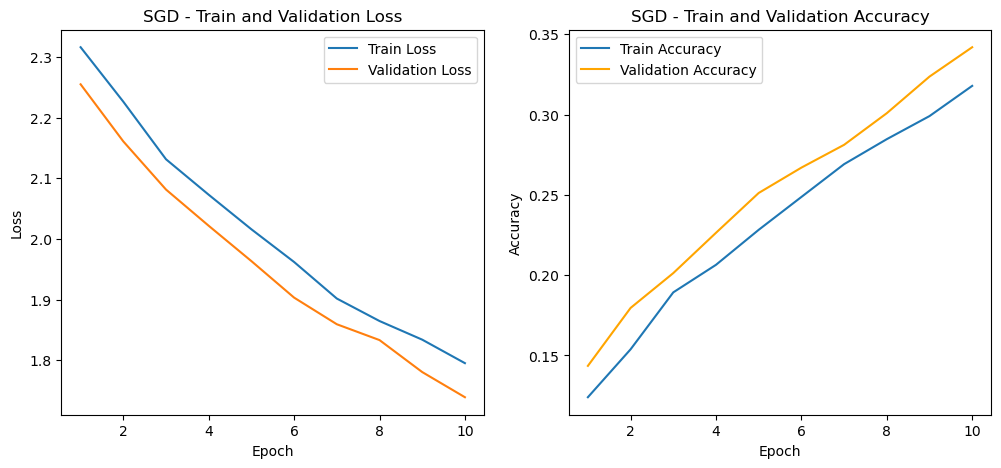

Training with Adam, learning rate: 0.01
Epoch 1/10, Train Loss: 2.2836, Train Accuracy: 0.1882, Val Loss: 1.9048, Val Accuracy: 0.2820
Epoch 2/10, Train Loss: 1.8725, Train Accuracy: 0.2795, Val Loss: 1.7533, Val Accuracy: 0.3318
Epoch 3/10, Train Loss: 1.7318, Train Accuracy: 0.3398, Val Loss: 1.6280, Val Accuracy: 0.3668
Epoch 4/10, Train Loss: 1.5914, Train Accuracy: 0.4007, Val Loss: 1.5813, Val Accuracy: 0.3962
Epoch 5/10, Train Loss: 1.4727, Train Accuracy: 0.4549, Val Loss: 1.4983, Val Accuracy: 0.4460
Epoch 6/10, Train Loss: 1.3772, Train Accuracy: 0.5049, Val Loss: 1.3349, Val Accuracy: 0.5166
Epoch 7/10, Train Loss: 1.2921, Train Accuracy: 0.5433, Val Loss: 1.2421, Val Accuracy: 0.5604
Epoch 8/10, Train Loss: 1.2260, Train Accuracy: 0.5692, Val Loss: 1.2833, Val Accuracy: 0.5348
Epoch 9/10, Train Loss: 1.1708, Train Accuracy: 0.5888, Val Loss: 1.1679, Val Accuracy: 0.5762
Epoch 10/10, Train Loss: 1.1214, Train Accuracy: 0.6059, Val Loss: 1.1703, Val Accuracy: 0.5751


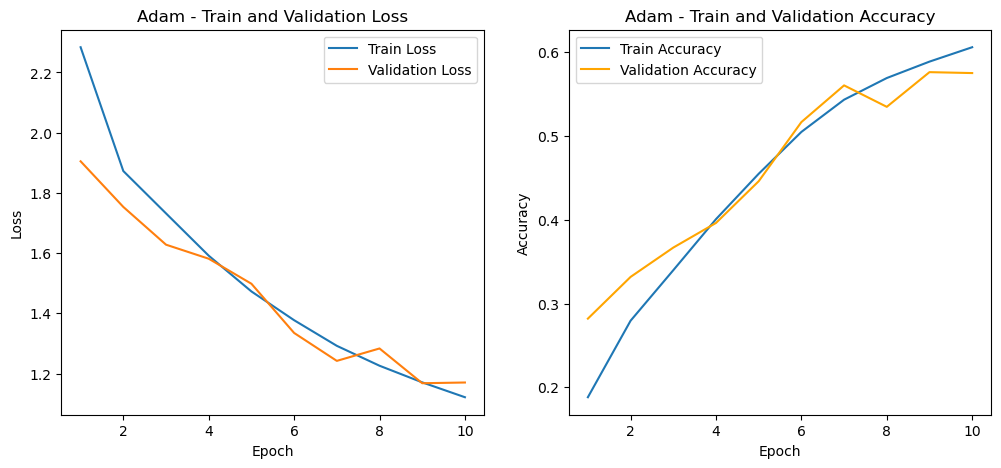

Training with Adam, learning rate: 0.001
Epoch 1/10, Train Loss: 2.0645, Train Accuracy: 0.2331, Val Loss: 1.8081, Val Accuracy: 0.3289
Epoch 2/10, Train Loss: 1.7537, Train Accuracy: 0.3447, Val Loss: 1.6519, Val Accuracy: 0.3996
Epoch 3/10, Train Loss: 1.6204, Train Accuracy: 0.4036, Val Loss: 1.5219, Val Accuracy: 0.4390
Epoch 4/10, Train Loss: 1.5166, Train Accuracy: 0.4490, Val Loss: 1.5033, Val Accuracy: 0.4682
Epoch 5/10, Train Loss: 1.4381, Train Accuracy: 0.4782, Val Loss: 1.3774, Val Accuracy: 0.5035
Epoch 6/10, Train Loss: 1.3653, Train Accuracy: 0.5090, Val Loss: 1.3064, Val Accuracy: 0.5207
Epoch 7/10, Train Loss: 1.3001, Train Accuracy: 0.5362, Val Loss: 1.2244, Val Accuracy: 0.5573
Epoch 8/10, Train Loss: 1.2487, Train Accuracy: 0.5556, Val Loss: 1.1473, Val Accuracy: 0.5867
Epoch 9/10, Train Loss: 1.1556, Train Accuracy: 0.5878, Val Loss: 1.1453, Val Accuracy: 0.5911
Epoch 10/10, Train Loss: 1.1003, Train Accuracy: 0.6107, Val Loss: 1.0379, Val Accuracy: 0.6305


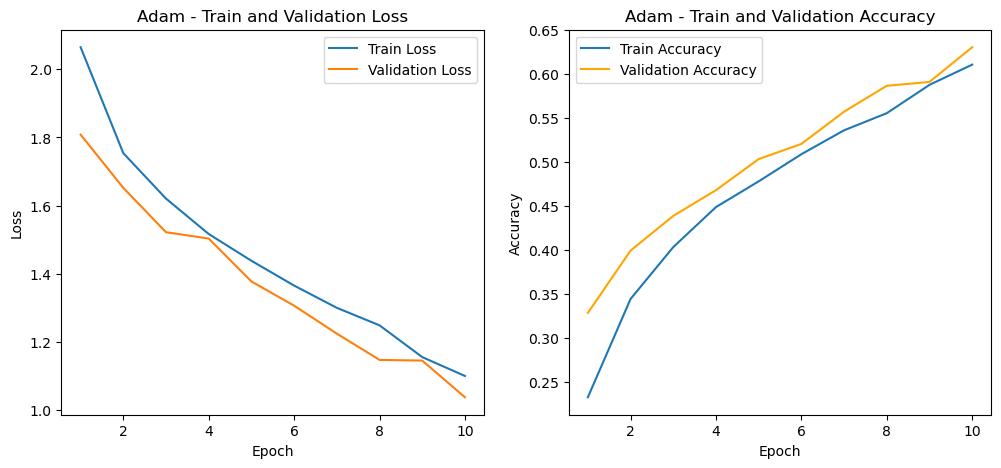

Best hyper-parameters: Optimizer=Adam, Learning rate=0.001
Epoch 1/10, Train Loss: 2.0482, Train Accuracy: 0.2349, Val Loss: 1.7867, Val Accuracy: 0.3105
Epoch 2/10, Train Loss: 1.7387, Train Accuracy: 0.3444, Val Loss: 1.6330, Val Accuracy: 0.3997
Epoch 3/10, Train Loss: 1.6111, Train Accuracy: 0.4051, Val Loss: 1.5252, Val Accuracy: 0.4454
Epoch 4/10, Train Loss: 1.5206, Train Accuracy: 0.4420, Val Loss: 1.4890, Val Accuracy: 0.4533
Epoch 5/10, Train Loss: 1.4462, Train Accuracy: 0.4749, Val Loss: 1.3795, Val Accuracy: 0.4967
Epoch 6/10, Train Loss: 1.3686, Train Accuracy: 0.5081, Val Loss: 1.2867, Val Accuracy: 0.5331
Epoch 7/10, Train Loss: 1.2894, Train Accuracy: 0.5403, Val Loss: 1.2178, Val Accuracy: 0.5606
Epoch 8/10, Train Loss: 1.2152, Train Accuracy: 0.5690, Val Loss: 1.1452, Val Accuracy: 0.5868
Epoch 9/10, Train Loss: 1.1562, Train Accuracy: 0.5904, Val Loss: 1.0945, Val Accuracy: 0.6096
Epoch 10/10, Train Loss: 1.0940, Train Accuracy: 0.6143, Val Loss: 1.0591, Val Accurac

In [26]:
# MobileNet model for comparison
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset with existing normalization applied
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load CIFAR-10 training dataset
full_train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split training data into training and separate validation set (e.g., 80-20 split)
train_idx, val_idx = train_test_split(range(len(full_train_dataset)), test_size=0.2, random_state=42)
train_dataset = Subset(full_train_dataset, train_idx)
val_dataset = Subset(full_train_dataset, val_idx)

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Load CIFAR-10 test dataset
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model template (MobileNet)
def create_mobilenet_model():
    model = models.mobilenet_v2(weights=None)  # Not using pretrained weights
    num_features = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_features, 10)  # CIFAR-10 has 10 classes
    return model

# Set training parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
num_epochs = 10  # Adjusted number of epochs for faster training
batch_size = 64

# Function to train the model
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)
    accuracy = correct / total_samples
    return total_loss / len(train_loader), accuracy

# Function to validate the model
def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
    accuracy = correct / len(val_loader.dataset)
    return total_loss / len(val_loader), accuracy

# Hyper-parameter tuning: Experiment with different optimizers and learning rates
hyper_params = [
    (optim.SGD, 0.01),
    (optim.SGD, 0.001),
    (optim.Adam, 0.01),
    (optim.Adam, 0.001)
]

best_val_accuracy = 0
best_hyper_params = None

for opt_func, lr, *kwargs in hyper_params:
    print(f"Training with {opt_func.__name__}, learning rate: {lr}")

    # Create a new instance of MobileNet
    model = create_mobilenet_model().to(device)
    optimizer = opt_func(model.parameters(), lr=lr, **(kwargs[0] if kwargs else {}))

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Track best hyper-parameters
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_hyper_params = (opt_func, lr, kwargs)

    # Plotting training and validation metrics for this configuration
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{opt_func.__name__} - Train and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{opt_func.__name__} - Train and Validation Accuracy')
    plt.show()

# Report test accuracy using the best hyper-parameters
print(f"Best hyper-parameters: Optimizer={best_hyper_params[0].__name__}, Learning rate={best_hyper_params[1]}")
model = create_mobilenet_model().to(device)
optimizer = best_hyper_params[0](model.parameters(), lr=best_hyper_params[1], **(best_hyper_params[2][0] if best_hyper_params[2] else {}))

# Train final model with best hyper-parameters
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Evaluate on the test set
test_loss, test_accuracy = validate(model, test_loader, criterion, device)
print(f"Test Accuracy: {test_accuracy:.4f}")


Files already downloaded and verified
Files already downloaded and verified
Training with SGD, learning rate: 0.01
Epoch 1/10, Train Loss: 2.1625, Train Accuracy: 0.1783, Val Loss: 2.0899, Val Accuracy: 0.2436
Epoch 2/10, Train Loss: 1.9211, Train Accuracy: 0.2690, Val Loss: 2.0871, Val Accuracy: 0.3128
Epoch 3/10, Train Loss: 1.7811, Train Accuracy: 0.3343, Val Loss: 1.7696, Val Accuracy: 0.3700
Epoch 4/10, Train Loss: 1.6817, Train Accuracy: 0.3706, Val Loss: 1.7150, Val Accuracy: 0.3993
Epoch 5/10, Train Loss: 1.6170, Train Accuracy: 0.3982, Val Loss: 1.5631, Val Accuracy: 0.4306
Epoch 6/10, Train Loss: 1.5532, Train Accuracy: 0.4234, Val Loss: 1.5274, Val Accuracy: 0.4491
Epoch 7/10, Train Loss: 1.5000, Train Accuracy: 0.4475, Val Loss: 1.4844, Val Accuracy: 0.4689
Epoch 8/10, Train Loss: 1.4592, Train Accuracy: 0.4634, Val Loss: 1.4311, Val Accuracy: 0.4909
Epoch 9/10, Train Loss: 1.4178, Train Accuracy: 0.4815, Val Loss: 1.4068, Val Accuracy: 0.4999
Epoch 10/10, Train Loss: 1.383

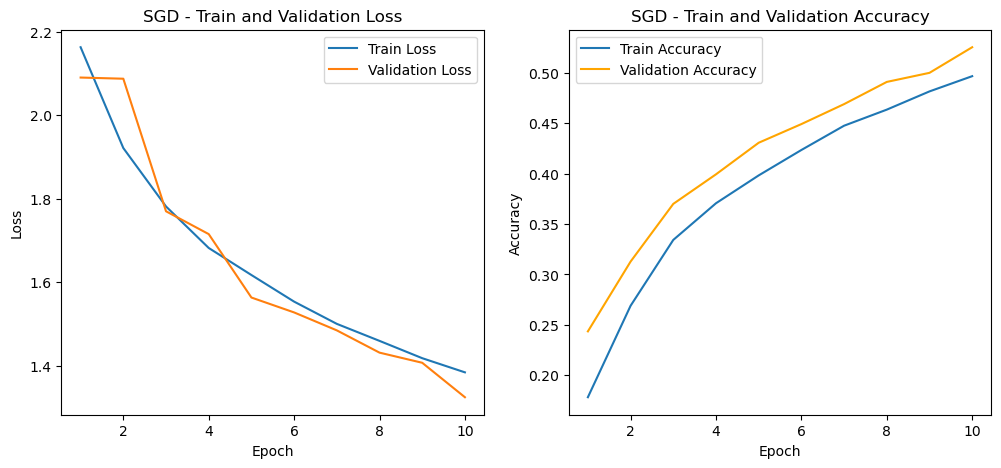

Training with SGD, learning rate: 0.001
Epoch 1/10, Train Loss: 2.3214, Train Accuracy: 0.1268, Val Loss: 2.3712, Val Accuracy: 0.1288
Epoch 2/10, Train Loss: 2.2012, Train Accuracy: 0.1708, Val Loss: 2.2246, Val Accuracy: 0.1988
Epoch 3/10, Train Loss: 2.0805, Train Accuracy: 0.2074, Val Loss: 2.1458, Val Accuracy: 0.2342
Epoch 4/10, Train Loss: 2.0009, Train Accuracy: 0.2277, Val Loss: 2.0961, Val Accuracy: 0.2607
Epoch 5/10, Train Loss: 1.9384, Train Accuracy: 0.2606, Val Loss: 2.0035, Val Accuracy: 0.2931
Epoch 6/10, Train Loss: 1.8816, Train Accuracy: 0.2826, Val Loss: 1.9640, Val Accuracy: 0.3081
Epoch 7/10, Train Loss: 1.8384, Train Accuracy: 0.3024, Val Loss: 1.8914, Val Accuracy: 0.3398
Epoch 8/10, Train Loss: 1.7988, Train Accuracy: 0.3194, Val Loss: 1.8175, Val Accuracy: 0.3482
Epoch 9/10, Train Loss: 1.7681, Train Accuracy: 0.3330, Val Loss: 1.8348, Val Accuracy: 0.3558
Epoch 10/10, Train Loss: 1.7375, Train Accuracy: 0.3433, Val Loss: 1.8068, Val Accuracy: 0.3664


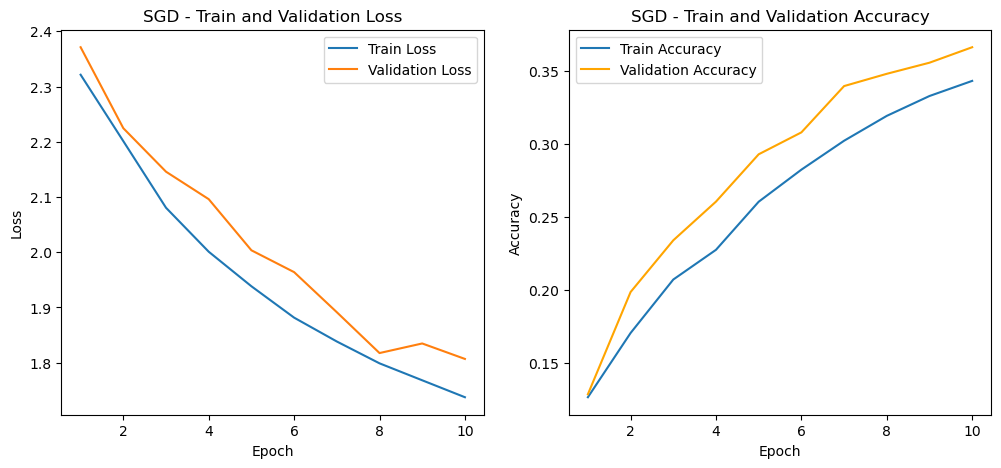

Training with Adam, learning rate: 0.01
Epoch 1/10, Train Loss: 2.5166, Train Accuracy: 0.1374, Val Loss: 2.2444, Val Accuracy: 0.1594
Epoch 2/10, Train Loss: 2.0263, Train Accuracy: 0.2204, Val Loss: 2.1868, Val Accuracy: 0.1995
Epoch 3/10, Train Loss: 2.0745, Train Accuracy: 0.1953, Val Loss: 1.9862, Val Accuracy: 0.2184
Epoch 4/10, Train Loss: 2.0892, Train Accuracy: 0.1867, Val Loss: 2.0577, Val Accuracy: 0.1866
Epoch 5/10, Train Loss: 2.0720, Train Accuracy: 0.1814, Val Loss: 1.9935, Val Accuracy: 0.1886
Epoch 6/10, Train Loss: 1.9849, Train Accuracy: 0.2211, Val Loss: 2.2097, Val Accuracy: 0.1859
Epoch 7/10, Train Loss: 2.1653, Train Accuracy: 0.1641, Val Loss: 2.2047, Val Accuracy: 0.1630
Epoch 8/10, Train Loss: 2.3173, Train Accuracy: 0.1211, Val Loss: 2.2972, Val Accuracy: 0.1137
Epoch 9/10, Train Loss: 2.2211, Train Accuracy: 0.1457, Val Loss: 2.0850, Val Accuracy: 0.1878
Epoch 10/10, Train Loss: 1.9993, Train Accuracy: 0.2103, Val Loss: 1.8929, Val Accuracy: 0.2404


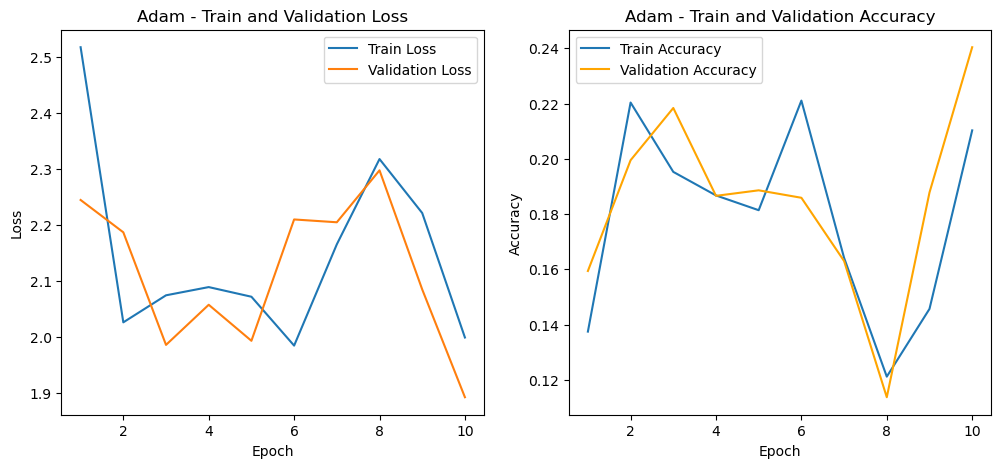

Training with Adam, learning rate: 0.001
Epoch 1/10, Train Loss: 1.9753, Train Accuracy: 0.2612, Val Loss: 1.7267, Val Accuracy: 0.3510
Epoch 2/10, Train Loss: 1.6790, Train Accuracy: 0.3801, Val Loss: 1.6283, Val Accuracy: 0.4199
Epoch 3/10, Train Loss: 1.5471, Train Accuracy: 0.4340, Val Loss: 1.4002, Val Accuracy: 0.4861
Epoch 4/10, Train Loss: 1.4156, Train Accuracy: 0.4871, Val Loss: 1.3732, Val Accuracy: 0.5054
Epoch 5/10, Train Loss: 1.3204, Train Accuracy: 0.5255, Val Loss: 1.2093, Val Accuracy: 0.5593
Epoch 6/10, Train Loss: 1.2312, Train Accuracy: 0.5604, Val Loss: 1.1740, Val Accuracy: 0.5712
Epoch 7/10, Train Loss: 1.1597, Train Accuracy: 0.5896, Val Loss: 1.0616, Val Accuracy: 0.6153
Epoch 8/10, Train Loss: 1.1067, Train Accuracy: 0.6058, Val Loss: 1.0628, Val Accuracy: 0.6231
Epoch 9/10, Train Loss: 1.1541, Train Accuracy: 0.5926, Val Loss: 1.0491, Val Accuracy: 0.6241
Epoch 10/10, Train Loss: 1.0788, Train Accuracy: 0.6183, Val Loss: 1.0113, Val Accuracy: 0.6378


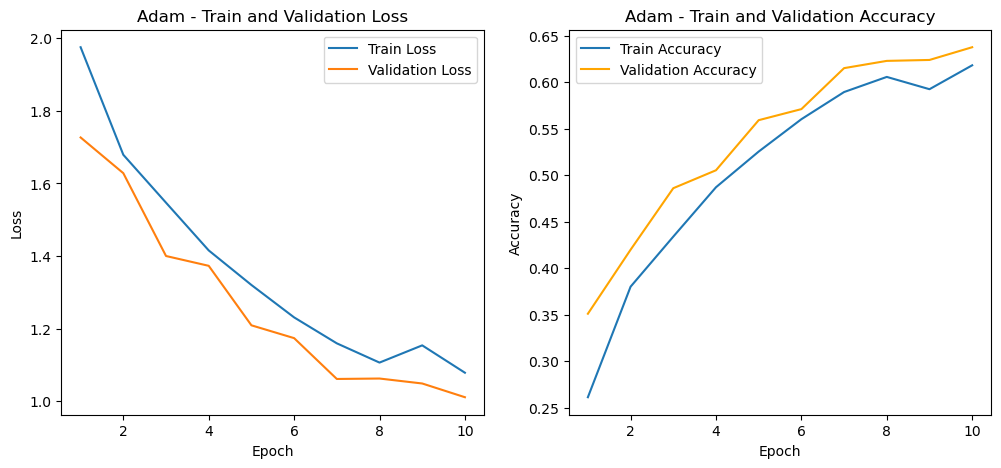

Best hyper-parameters: Optimizer=Adam, Learning rate=0.001
Epoch 1/10, Train Loss: 2.0142, Train Accuracy: 0.2436, Val Loss: 1.7773, Val Accuracy: 0.3330
Epoch 2/10, Train Loss: 1.6860, Train Accuracy: 0.3765, Val Loss: 1.5951, Val Accuracy: 0.4193
Epoch 3/10, Train Loss: 1.5164, Train Accuracy: 0.4520, Val Loss: 1.4002, Val Accuracy: 0.4944
Epoch 4/10, Train Loss: 1.3827, Train Accuracy: 0.5038, Val Loss: 1.2601, Val Accuracy: 0.5505
Epoch 5/10, Train Loss: 1.2726, Train Accuracy: 0.5487, Val Loss: 1.3277, Val Accuracy: 0.5310
Epoch 6/10, Train Loss: 1.1899, Train Accuracy: 0.5760, Val Loss: 1.1151, Val Accuracy: 0.6163
Epoch 7/10, Train Loss: 1.1330, Train Accuracy: 0.6014, Val Loss: 1.1213, Val Accuracy: 0.6024
Epoch 8/10, Train Loss: 1.0852, Train Accuracy: 0.6171, Val Loss: 1.0725, Val Accuracy: 0.6187
Epoch 9/10, Train Loss: 1.1296, Train Accuracy: 0.5968, Val Loss: 1.0858, Val Accuracy: 0.6181
Epoch 10/10, Train Loss: 1.0935, Train Accuracy: 0.6122, Val Loss: 0.9697, Val Accurac

In [27]:
# EfficientNet model for comparison
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset with existing normalization applied
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load CIFAR-10 training dataset
full_train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split training data into training and separate validation set (e.g., 80-20 split)
train_idx, val_idx = train_test_split(range(len(full_train_dataset)), test_size=0.2, random_state=42)
train_dataset = Subset(full_train_dataset, train_idx)
val_dataset = Subset(full_train_dataset, val_idx)

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Load CIFAR-10 test dataset
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model template (EfficientNet)
def create_efficientnet_model():
    model = models.efficientnet_b0(weights=None)  # Not using pretrained weights
    num_features = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_features, 10)  # CIFAR-10 has 10 classes
    return model

# Set training parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
num_epochs = 10  # Adjusted number of epochs for faster training
batch_size = 64

# Function to train the model
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)
    accuracy = correct / total_samples
    return total_loss / len(train_loader), accuracy

# Function to validate the model
def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
    accuracy = correct / len(val_loader.dataset)
    return total_loss / len(val_loader), accuracy

# Hyper-parameter tuning: Experiment with different optimizers and learning rates
hyper_params = [
    (optim.SGD, 0.01),
    (optim.SGD, 0.001),
    (optim.Adam, 0.01),
    (optim.Adam, 0.001)
]

best_val_accuracy = 0
best_hyper_params = None

for opt_func, lr, *kwargs in hyper_params:
    print(f"Training with {opt_func.__name__}, learning rate: {lr}")

    # Create a new instance of EfficientNet
    model = create_efficientnet_model().to(device)
    optimizer = opt_func(model.parameters(), lr=lr, **(kwargs[0] if kwargs else {}))

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = validate(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Track best hyper-parameters
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_hyper_params = (opt_func, lr, kwargs)

    # Plotting training and validation metrics for this configuration
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{opt_func.__name__} - Train and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{opt_func.__name__} - Train and Validation Accuracy')
    plt.show()

# Report test accuracy using the best hyper-parameters
print(f"Best hyper-parameters: Optimizer={best_hyper_params[0].__name__}, Learning rate={best_hyper_params[1]}")
model = create_efficientnet_model().to(device)
optimizer = best_hyper_params[0](model.parameters(), lr=best_hyper_params[1], **(best_hyper_params[2][0] if best_hyper_params[2] else {}))

# Train final model with best hyper-parameters
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Evaluate on the test set
test_loss, test_accuracy = validate(model, test_loader, criterion, device)
print(f"Test Accuracy: {test_accuracy:.4f}")
